# Week 8: Turing Machines

In [1]:
from tock import *
from IPython.display import IFrame, HTML

## Tuesday

We have been climbing up the [Chomsky hierarchy](https://en.wikipedia.org/wiki/Chomsky_hierarchy) of language classes (cf. Figure 4.10):

| Unit | Language class                | Automaton                 | Grammar                      |
|------|:------------------------------|:--------------------------|:-----------------------------|
| III  | Turing-recognizable languages | Turing machines           | *Unrestricted grammars*      |
|      | *Context-sensitive languages* | *Linear bounded automata* | *Context-sensitive grammars* |
| II   | Context-free languages        | Pushdown automata         | Context-free grammars        |
| I    | Regular languages             | Finite automata           | Regular expressions          |

(Cells in italics are not core topics in this course, though we will mention them at some point.)

Now we begin Unit III of the course and finally introduce Turing machines (TMs), which sit at the top of the hierarchy, because, as we will discuss at the end of today's lecture, we think Turing machines define what it is possible to compute.

### Definition of Turing machines

<div class="alert alert-info">
    <p><b>Read</b> both the informal and formal definitions of TMs (165–170). For now, you can skim or skip over the definition of configuration (page 168 at "As a Turing machine computes" through the end of page 169), though we will certainly need it later.</p>
    <p><b>Watch</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d4785302-baf2-4855-9084-ac0000d9fa6b">W8E1: Turing Machines</a>.</p>
</div>

There are many variations out there in the definition of TMs. Be careful if you refer to other sources.

The parts of a TM:

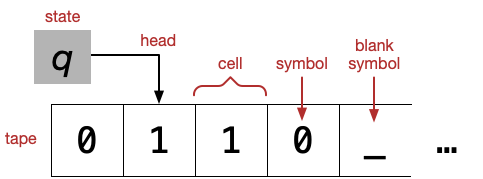

The start configuration:

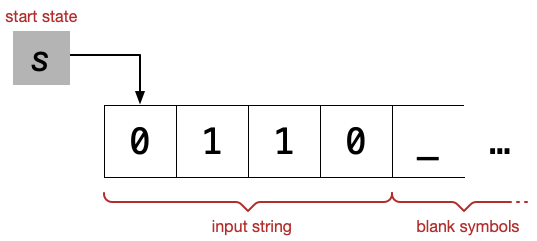

A transition:
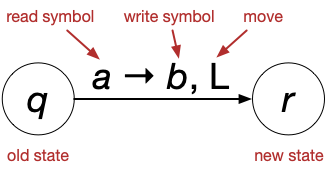

The formal definition of TM implies that it is deterministic: For any state $q$ and symbol $a$, there must be exactly one transition from $q$ on symbol $a$.

If the machine:

- is in state $q$
- the current symbol is $a$

then the machine will:

- write symbol $b$
- move left (L)
- go to state $r$. 

More about moves:

- If the head is already on the leftmost cell and a transition says to move left, the head remains on the leftmost cell.
- The move can be L for "move left" or R for "move right". We also allow S for "stay". (My notes may also have N for "no move", which means exactly the same thing.)

There are three possible outcomes of a TM run:

- If the machine enters the accept state, it halts and accepts the string.
- If the machine enters the reject state, it halts and rejects the string.
- If the machine runs forever, we say that it *loops*.

Looping is something we've never had to worry about before. Deterministic FAs and PDAs can't loop; nondeterministic FAs and PDAs can loop (because of cycles of $\varepsilon$-transitions), but it's always possible to change such machines into an equivalent ones that do not loop. But with Turing machines, the possibility of looping is real and *very* important.

Consequently, there is an important distinction between:

- A language is *Turing-recognizable* (more commonly called "recursively enumerable" or "computably enumerable") if there is a TM that accepts all strings in the language and *rejects or loops on* all strings not in the language.
- A language is (Turing-)decidable (also called "recursive" or "computable") if there is a TM that accepts all strings in the language and *rejects* all strings not in the language.

People have built various [physical](http://aturingmachine.com) [Turing](https://www.youtube.com/watch?v=ivPv_kaYuwk) [machines](https://www.youtube.com/watch?v=40DkJ9vt5CI&t=14s), including TMs made out of [Lego Mindstorms](https://vimeo.com/channels/staffpicks/44202270), [Lego and air tubes](https://videotheque.cnrs.fr/doc=3001), [wood](https://www.youtube.com/watch?v=vo8izCKHiF0), and [Redstone](https://www.youtube.com/watch?v=pJO__eTIqb0).

In [2]:
IFrame(width=560, height=315, src="https://www.youtube.com/embed/E3keLeMwfHY")

In [3]:
IFrame(width=560, height=315, src="https://www.youtube.com/embed/vo8izCKHiF0")

In [4]:
IFrame(width=560, height=315, src="https://www.youtube.com/embed/KrNTmOSVW-U")

### Examples: formal descriptions

<div class="alert alert-info">
    <p><b>Read</b> the book's examples of TMs (170–175).</p>
    <p><b>Watch</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=746aca47-09b7-4545-8d58-ac0000d9fad2">W8E2: Turing Machine Examples</a>.</p>
</div>

Here are the book's two examples of formal descriptions. (Note that if you are Tock to *write* Turing machines, Tock's notation is different from Sipser's; see the Tock documentation.)

Machine $M_2$ recognizes the language $\{\texttt{0}^{2^n} \mid n \geq 0\}$.

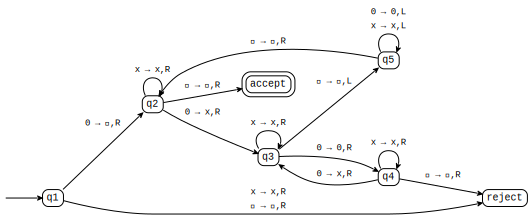

In [5]:
m2 = read_csv("tm-m2.csv")
to_graph(m2)

Here's an example run; try a few different input strings to see how the run changes.

In [6]:
run(m2, "0 0").only_path()

q1,[0] 0
q2,␣ [0]
q3,␣ x [␣]
q5,␣ [x] ␣
q5,[␣] x ␣
q2,␣ [x] ␣
q2,␣ x [␣]
accept,␣ x ␣ [␣]


Machine $M_1$ recognizes the language $\{w\#w \mid w \in \{\texttt{0}, \texttt{1}\}^\ast\}$.

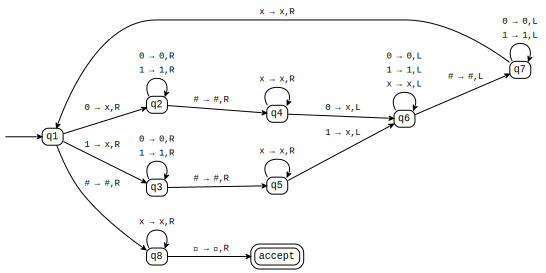

In [7]:
m1 = read_csv("tm-m1.csv")
m1

As explained at the bottom of page 173, the reject state is implicit in this example. You can do this when you write formal descriptions of TMs also.

In [8]:
run(m1, "0 1 1 0 0 0 # 0 1 1 0 0 0").only_path()

q1,[0] 1 1 0 0 0 # 0 1 1 0 0 0
q2,x [1] 1 0 0 0 # 0 1 1 0 0 0
q2,x 1 [1] 0 0 0 # 0 1 1 0 0 0
q2,x 1 1 [0] 0 0 # 0 1 1 0 0 0
q2,x 1 1 0 [0] 0 # 0 1 1 0 0 0
q2,x 1 1 0 0 [0] # 0 1 1 0 0 0
q2,x 1 1 0 0 0 [#] 0 1 1 0 0 0
q4,x 1 1 0 0 0 # [0] 1 1 0 0 0
q6,x 1 1 0 0 0 [#] x 1 1 0 0 0
q7,x 1 1 0 0 [0] # x 1 1 0 0 0
q7,x 1 1 0 [0] 0 # x 1 1 0 0 0


### Writing Turing machines

<div class="alert alert-info">
    <p><b>Read</b> the subsection "Terminology for Describing Turing Machines" (184–185).</p>
</div>    

Writing Turing machines is extremely tedious -- much more so than assembly language. Although some authors introduce a mechanism for defining "macros", Sipser takes a totally different approach, proposing three ways of defining Turing machines.

- You've seen formal descriptions. When you are asked for a formal description, either a table or a state diagram is fine.

- You've also seen pseudocode-like descriptions of Turing machines; Sipser calls these _implementation-level descriptions_. These abstract away from states and transitions, but they still speak in terms of the head moving on the tape and reading and writing symbols on the tape. They shouldn't, for example, make use of variables or arithmetic. See the examples in the book to get an idea of what is allowed and what isn't.

- _High-level descriptions_ will come later and abstract even away from the tape.

When we ask you to write a TM, we'll always specify what kind of description we're looking for.

## Thursday

### The Church-Turing thesis

<div class="alert alert-info">
    <p><b>Read</b> the rest of Section 3.3 (182–184).</p>
    <p><b>Watch</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=03d8a372-383f-4eac-b781-ac0000d9fb5b">W8E3: The Church-Turing Thesis</a>.</p>
</div>    

The Church-Turing thesis (CTT) is also often simply called "Church's thesis" but the name "Church-Turing thesis" acknowledges Turing's key role in developing the thesis.

Sipser's concise statement of the thesis is "*Intuitive notion of algorithms* equals *Turing machine algorithms*." It is a thesis (or possibly, a definition), not a theorem. Rather than prove it, we can only give arguments in favor of it.

The first justification comes from Turing's original paper (1936), where proposed Turing machines as a model of what _humans_ do when they compute. He imagined a computing person in an idealized scenario:

- He has an infinitely long paper tape, divided into squares.
- He can write one symbol in each square, and the number of possible symbols is finite (e.g., `0` to `9`).
- He can only look at a finite number of squares at a time. 
- He can only move a finite distance at a time.
- He has only a finite number of “states of mind.”

Basically this is an appeal to intuition that when people compute, this is what they do. Furthermore, he proved (quite briefly) that Turing machines can perform any such computation.

In addition to Turing's original justification, another justification for the CTT, the one more commonly cited today, is that many other proposals have been made for models of computability, and for the most part they have all turned out to be equivalent to Turing machines. The end of Section 3.2 alludes to some of these. The most important ones are probably:

- The [untyped lambda calculus](https://en.wikipedia.org/wiki/Lambda_calculus)
- [Partial recursive functions](https://en.wikipedia.org/wiki/Μ-recursive_function)
- [Unrestricted grammars](https://en.wikipedia.org/wiki/Unrestricted_grammar)

[Accidentally Turing Complete](http://beza1e1.tuxen.de/articles/accidentally_turing_complete.html) is a collection of other weird things that are equivalent to TMs.

An important subcase of this argument is that no matter how we try to augment Turing machines to make them more powerful, it seems to always turn out to be equivalent to standard Turing machines. This is the topic of the next class.